## Statistical functions

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [7]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline

### chi2

$f(x, k) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}\exp(-x/2)$ 

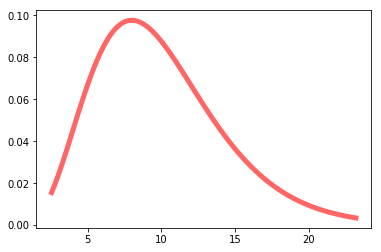

In [23]:
fig, ax = plt.subplots(1, 1)

df = 10

x = np.linspace(chi2.ppf(0.01, df),
    chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
    'r-', lw=5, alpha=0.6, label='chi2 pdf')

In [24]:
#Calculate a few first moments:
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
mean, var, skew, kurt 

(array(10.), array(20.), array(0.89442719), array(1.2))

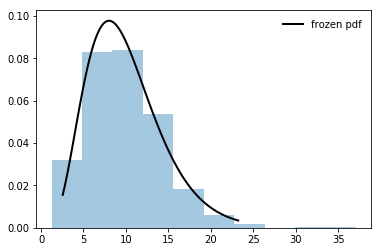

In [28]:
fig, ax = plt.subplots(1, 1)

# the distribution object can be called (as a function)
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#random numbers
r = chi2.rvs(df, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.4)
ax.legend(loc='best', frameon=False)
plt.show()


### Maxwell

$f(x)= \sqrt{2/\pi}x^2\exp(-x^2/2)$

A special case of a chi distribution, with df=3, loc=0.0, and given scale = a, 

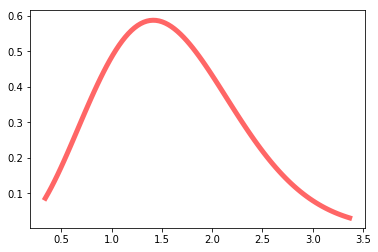

In [31]:
from scipy.stats import maxwell
fig, ax = plt.subplots(1, 1)
    
x = np.linspace(maxwell.ppf(0.01),
    maxwell.ppf(0.99), 100)
ax.plot(x, maxwell.pdf(x),
    'r-', lw=5, alpha=0.6, label='maxwell pdf')

In [34]:
mean, var, skew, kurt = maxwell.stats(moments='mvsk')
mean, var, skew, kurt

(array(1.59576912), array(0.45352091), array(0.48569283), array(0.10816384))

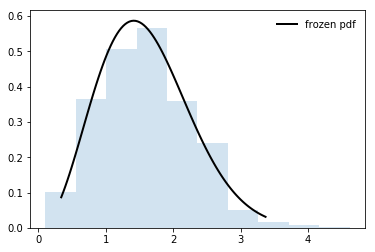

In [35]:
fig, ax = plt.subplots(1, 1)

rv = maxwell()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = maxwell.rvs(size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Rayleigh

$f(x)= x\exp(-x^2/2)$

rayleigh is a special case of chi with df=2.

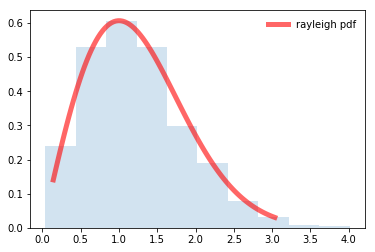

In [37]:
from scipy.stats import rayleigh

fig, ax = plt.subplots(1, 1)

x = np.linspace(rayleigh.ppf(0.01),
    rayleigh.ppf(0.99), 100)
ax.plot(x, rayleigh.pdf(x),
    'r-', lw=5, alpha=0.6, label='rayleigh pdf')

r = rayleigh.rvs(size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### multivariate_normal

$f(x) = \frac{1}{\sqrt{(2\pi)^k  det \sum}}\exp\left(-\frac{1}{2}(x-\mu)^T \sum^{-1} (x-\mu) \right)$ 

In [38]:
from scipy.stats import multivariate_normal

In [39]:
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); 
y

array([0.00108914, 0.01033349, 0.05946514, 0.20755375, 0.43939129,
       0.56418958, 0.43939129, 0.20755375, 0.05946514, 0.01033349])

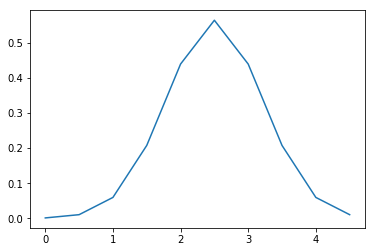

In [40]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

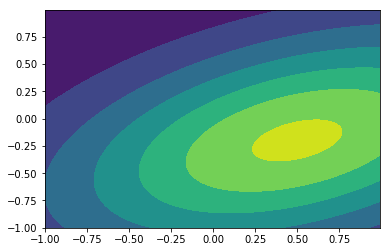

In [50]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)


x, y = np.mgrid[-1:1:.01, -1:1:.01]
rv = multivariate_normal([0.5, -0.2], [[1.0, 0.3], [0.3, 0.5]])

pos = np.dstack((x, y))
ax2.contourf(x, y, rv.pdf(pos))

### A matrix-valued SO(N) random variable.

In [54]:
from scipy.stats import special_ortho_group
special_ortho_group.rvs(3)


array([[ 0.80826731, -0.55543227, -0.19544552],
       [-0.37610579, -0.74240111,  0.55442315],
       [-0.45304348, -0.37461392, -0.80895984]])

### A Planck discrete exponential random variable.

$f(k) = (1- \exp(-\lambda)\exp(-\lambda k))$

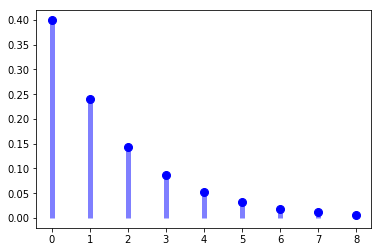

In [56]:
from scipy.stats import planck

fig, ax = plt.subplots(1, 1)
lambda_ = 0.51


x = np.arange(planck.ppf(0.01, lambda_),
    planck.ppf(0.99, lambda_))

ax.plot(x, planck.pmf(x, lambda_), 'bo', ms=8, label='planck pmf')
ax.vlines(x, 0, planck.pmf(x, lambda_), colors='b', lw=5, alpha=0.5)

### describe

In [57]:
from scipy import stats
a = np.arange(10)
stats.describe(a)

DescribeResult(nobs=10, minmax=(0, 9), mean=4.5, variance=9.166666666666666, skewness=0.0, kurtosis=-1.2242424242424244)

In [58]:
b = [[1, 2], [3, 4]]
stats.describe(b)

DescribeResult(nobs=2, minmax=(array([1, 2]), array([3, 4])), mean=array([2., 3.]), variance=array([2., 2.]), skewness=array([0., 0.]), kurtosis=array([-2., -2.]))

### Bayesian confidence intervals for the mean, var, and std.

In [60]:
n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
res_mean, res_var, res_std

(Mean(statistic=0.00023663676472395422, minmax=(-0.005936477719187087, 0.006409751248634996)),
 Variance(statistic=0.9920018464388107, minmax=(0.9833067266518387, 1.0006969662257827)),
 Std_dev(statistic=0.9959928947732563, minmax=(0.9916278436606418, 1.0003579458858707)))

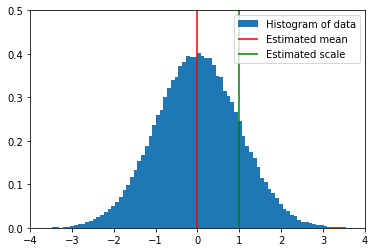

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(data, bins=100, density=True, label='Histogram of data')

ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
#ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
#    alpha=0.2, label=r'Estimated mean (95% limits)')

ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
#ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.9,
#    label=r'Estimated scale (95% limits)')

ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

### Return a cumulative frequency histogram

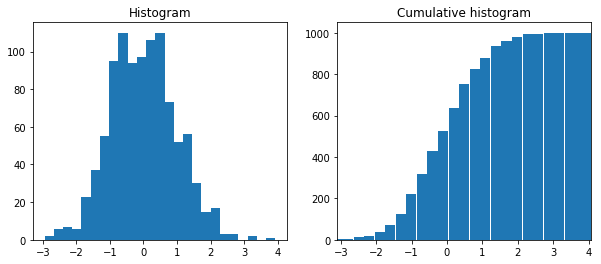

In [70]:
#Create a normal distribution with 1000 random values
rng = np.random.RandomState(seed=12345)
samples = stats.norm.rvs(size=1000, random_state=rng)

#Calculate cumulative frequencies
res = stats.cumfreq(samples, numbins=25)

#Calculate space of values for x
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
    res.cumcount.size)


fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(samples, bins=25)
ax1.set_title('Histogram')
ax2.bar(x, res.cumcount, width=res.binsize)
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])

plt.show()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed

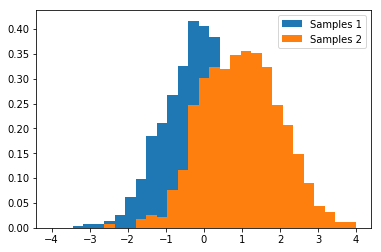

In [61]:
# Generates 2 sets of observations
samples1 = np.random.normal(0, size=1000)
samples2 = np.random.normal(1, size=1000)

# Compute a histogram of the sample
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(samples1, bins=bins, normed=True)
histogram2, bins = np.histogram(samples2, bins=bins, normed=True)

plt.figure(figsize=(6, 4))
plt.hist(samples1, bins=bins, normed=True, label="Samples 1")
plt.hist(samples2, bins=bins, normed=True, label="Samples 2")
plt.legend(loc='best')
plt.show()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


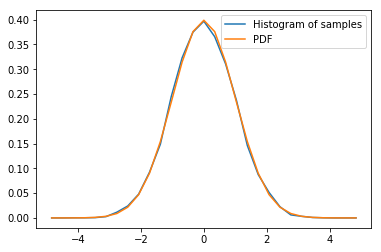

In [63]:
# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, normed=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats

pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples") 
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

## Integration and ODEs

https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate

In [5]:
from scipy import integrate
import numpy as np

$\int_0^4 x^2$

In [2]:
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [3]:
print(4**3 / 3.)  # analytical result

21.3333333333


$\int_0^\infty e^{-x}$

In [6]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

In [8]:
f = lambda x,a : a*x
y, err = integrate.quad(f, 0, 1, args=(1,))
y

0.5

In [9]:
y, err = integrate.quad(f, 0, 1, args=(3,))
y

1.5

### Ejercicio

In [10]:
y = lambda x: 1 if x<=0 else 0
integrate.quad(y, -1, 1)

(1.0, 1.1102230246251565e-14)

### Double integral

Compute the double integral of x * y**2 over the box x ranging from 0 to 2 and y ranging from 0 to 1.

In [11]:
f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)

(0.6666666666666667, 7.401486830834377e-15)

### Tripe integral

Compute the triple integral of x * y * z, over x ranging from 1 to 2, y ranging from 2 to 3, z ranging from 0 to 1.

In [12]:
f = lambda z, y, x: x*y*z
integrate.tplquad(f, 1, 2, lambda x: 2, lambda x: 3,
                   lambda x, y: 0, lambda x, y: 1)

(1.8750000000000002, 3.324644794257407e-14)

## nquad

## Integrating functions, given fixed samples

In [13]:
np.trapz([1,2,3])

4.0

In [14]:
np.trapz([1,2,3], x=[4,6,8])

8.0

In [15]:
np.trapz([1,2,3], dx=2)

8.0

### Simpson’s rule

In [16]:
x = np.arange(0, 10)
y = np.arange(0, 10)

In [17]:
integrate.simps(y, x)

40.5

In [18]:
y = np.power(x, 3)
integrate.simps(y, x)

1642.5

# ODE

Solve the ODE dy/dt = -2y between t = 0..4, with the initial condition y(t=0) = 1.

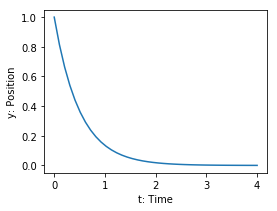

In [59]:
def calc_derivative(ypos, time): return -2*ypos

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

plt.figure(figsize=(4, 3))
plt.xlabel('t: Time')
plt.ylabel('y: Position')


plt.plot(time_vec, yvec)

#plt.tight_layout()
plt.show()

### pendulum

theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0

convert it to a system

theta'(t) = omega(t)

omega'(t) = -b*omega(t) - c*sin(theta(t))

In [19]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [20]:
b = 0.25
c = 5.0

In [21]:
y0 = [np.pi - 0.1, 0.0]

In [22]:
t = np.linspace(0, 10, 101)

In [25]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [29]:
sol = odeint(pend, y0, t, args=(b, c))

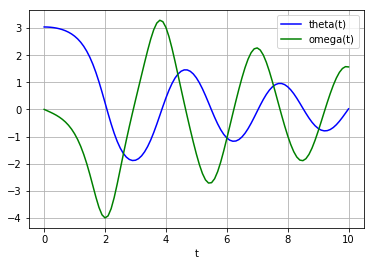

In [27]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Damped spring-mass oscillator

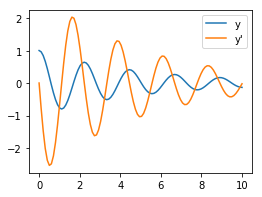

In [60]:
mass = 0.5 # kg 
kspring = 4 # N/m 
cviscous = 0.4 # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))

omega = np.sqrt(kspring / mass)


plt.figure(figsize=(4, 3))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.show()

## boundary-value problem

### bratu's problem

y'' + k * exp(y) = 0

y(0) = y(1) = 0

k = 1

y1' = y2

y2' = -exp(y1)


In [30]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

In [31]:
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [32]:
x = np.linspace(0, 1, 5)

In [51]:
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3
y_b

array([[3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0.]])

In [46]:
from scipy.integrate import solve_bvp

res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

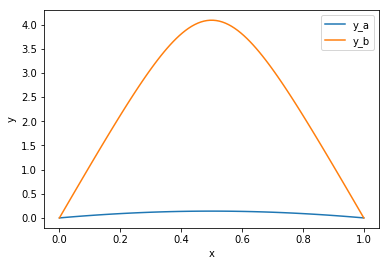

In [47]:
x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]

plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()